In [ ]:
import datetime as dt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)


In [ ]:
#some code to debug
yf.pdr_override()

In [19]:
#getting stock data
end=dt.datetime.now()
start=dt.datetime(2020,12,15)

df=pdr.get_data_yahoo('TSLA',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-15,214.426666,215.633331,207.933334,211.083328,211.083328,135214500
2020-12-16,209.410004,210.833328,201.666672,207.589996,207.589996,126287400
2020-12-17,209.396667,219.606674,206.500000,218.633331,218.633331,168810300
2020-12-18,222.966660,231.666672,209.513336,231.666672,231.666672,666378600
2020-12-21,222.080002,222.833328,215.356674,216.619995,216.619995,174135900


In [20]:
 #create moving average term
df['MA50']=df['Close'].rolling(window=50,min_periods=0).mean()
df['MA200']=df['Close'].rolling(window=200 ,min_periods=0).mean()
df['MA200'].head()

Date
2020-12-15    211.083328
2020-12-16    209.336662
2020-12-17    212.435552
2020-12-18    217.243332
2020-12-21    217.118665
Name: MA200, dtype: float64

In [21]:
#create plotly fig/subplot
fig=make_subplots(rows=2,cols=1,shared_xaxes=True,
                  vertical_spacing=0.1,subplot_titles=('TSLA','Volume'),
                  row_width=[0.3,0.7])
               

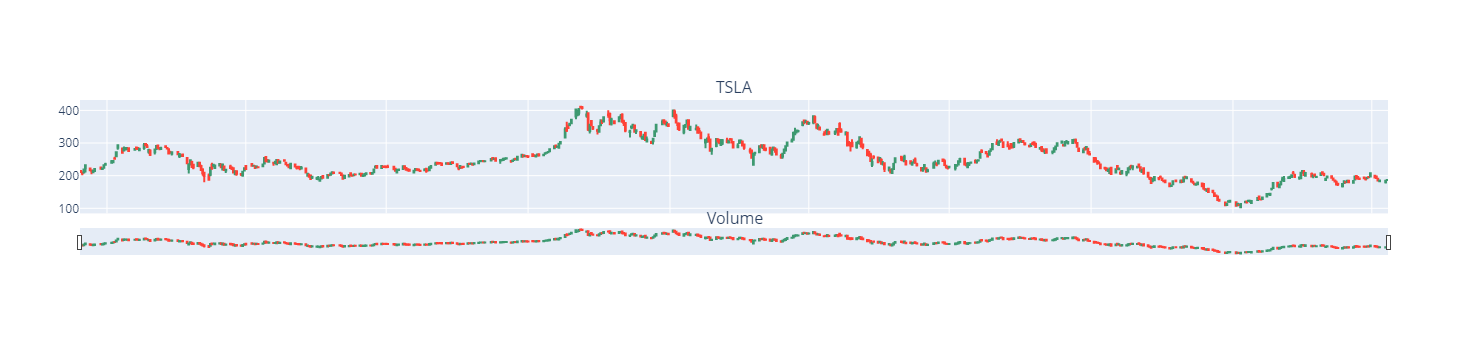

In [22]:
#adding open high low close candle:
fig.add_trace(go.Candlestick(x=df.index,open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'],name='OHLC'),row=1,col=1)

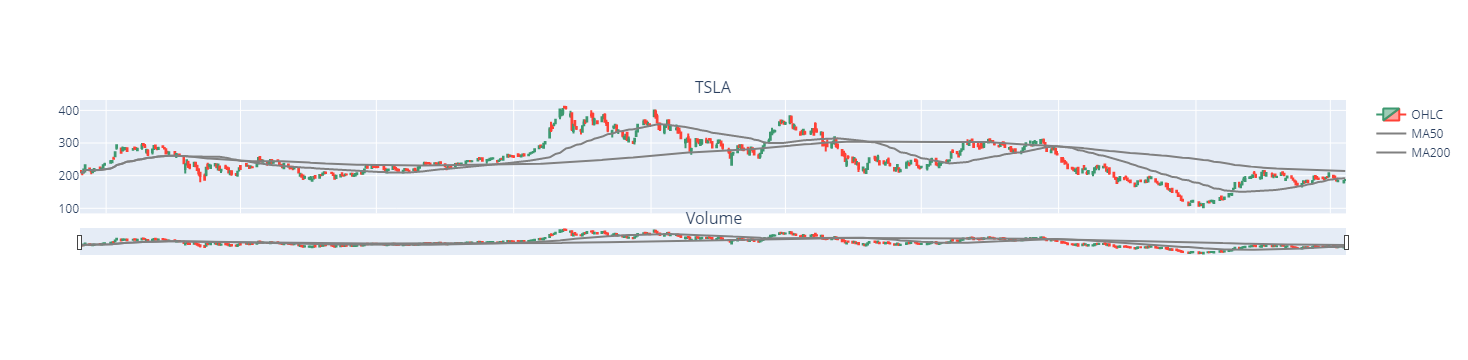

In [23]:
#adding moving average terms:
fig.add_trace(go.Scatter(x=df.index,y=df['MA50'],marker_color='grey',name='MA50'),row=1,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['MA200'],marker_color='grey',name='MA200'),row=1,col=1)

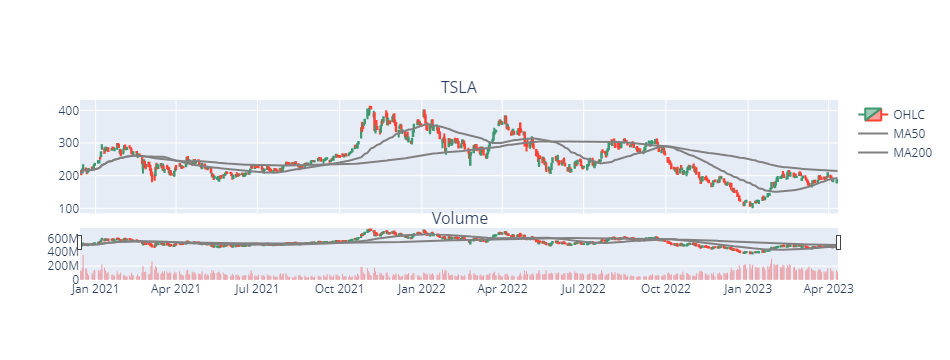

In [27]:
#add volume bar chart in subplot:
fig.add_trace(go.Bar(x=df.index,y=df['Volume'],marker_color='red',showlegend=False),row=2,col=1)

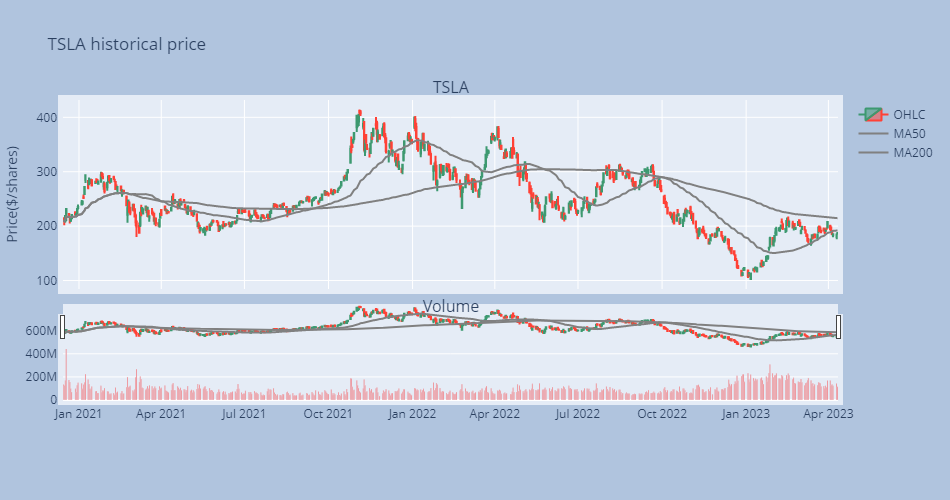

In [36]:
#update attributes:
fig.update_layout(
    title='TSLA historical price',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price($/shares)',
        titlefont_size=14,
        tickfont_size=12),
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=5),
    paper_bgcolor='LightSteelBlue'
)

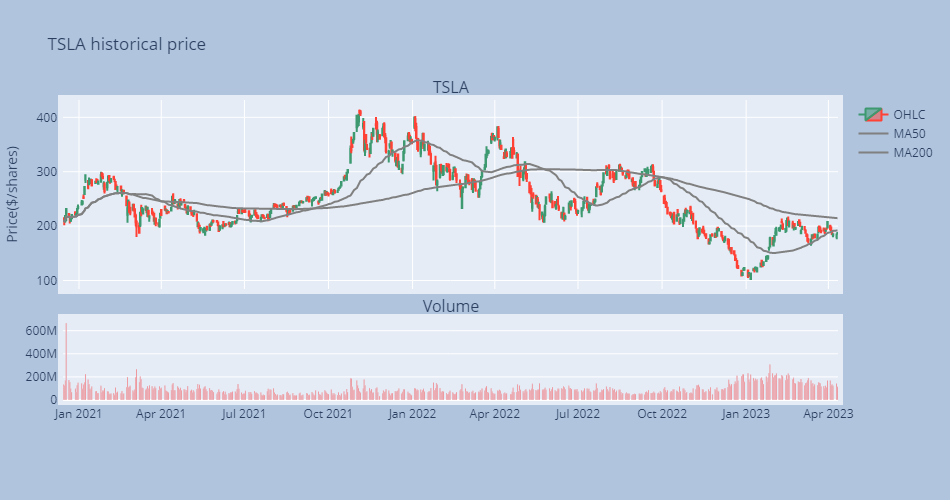

In [39]:
#remove range slider
fig.update(layout_xaxis_rangeslider_visible=False)